<a href="https://colab.research.google.com/github/teddcp/Machine-Learning-/blob/master/Task_Wipro_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data= pd.read_csv('/content/task.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
372,45501,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,-0.984172,-0.567380,-1.105592,-1.381214,0.405490,0.279890,1.132160,0.092993,-0.298920,0.016004,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1
373,45541,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,-2.755797,3.438248,-3.521529,-0.918761,-4.452100,0.499314,-2.907903,-5.248646,-0.936815,1.160120,0.175019,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1
374,46057,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,2.962599,-3.956045,-1.539232,-4.634631,-0.248403,-2.058551,-5.635494,-0.775271,-0.239310,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
375,46149,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,-3.364011,2.887048,-3.784460,-1.288904,-3.985626,0.531838,-2.603703,-5.157596,-0.696010,1.285961,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
376,46925,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,-0.550545,1.480286,-0.105359,-0.804841,-0.819902,0.916882,0.201151,0.874891,0.941477,0.272698,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1


In [4]:
data.info()   

# All are numerical columns
# No Null value is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    377 non-null    int64  
 1   V1      377 non-null    float64
 2   V2      377 non-null    float64
 3   V3      377 non-null    float64
 4   V4      377 non-null    float64
 5   V5      377 non-null    float64
 6   V6      377 non-null    float64
 7   V7      377 non-null    float64
 8   V8      377 non-null    float64
 9   V9      377 non-null    float64
 10  V10     377 non-null    float64
 11  V11     377 non-null    float64
 12  V12     377 non-null    float64
 13  V13     377 non-null    float64
 14  V14     377 non-null    float64
 15  V15     377 non-null    float64
 16  V16     377 non-null    float64
 17  V17     377 non-null    float64
 18  V18     377 non-null    float64
 19  V19     377 non-null    float64
 20  V20     377 non-null    float64
 21  V21     377 non-null    float64
 22  V2

In [5]:
data[['Time','Amount','Class','V1','V5','V10', 'V15','V20','V25','V28']].describe()

# Time and Amount has the highest Variance
# From v1 to v28, Variance keeps decreasing 

,Time,Amount,Class,V1,V5,V10,V15,V20,V25,V28
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,11560.519894,91.942308,0.413793,-3.177834,-2.249336,-2.974752,0.212045,0.194470,0.188378,-0.006960
std,16113.132954,275.995924,0.493167,6.509699,5.052097,4.708454,0.857160,0.832666,0.728184,0.472548
min,0.000000,0.000000,0.000000,-30.552380,-22.105532,-18.271168,-3.618060,-3.042626,-4.781606,-1.869290
25%,64.000000,1.980000,0.000000,-3.240187,-2.315027,-5.390330,-0.309229,-0.171608,-0.137521,-0.059752
50%,124.000000,17.280000,0.000000,-0.833200,-0.468466,-0.482474,0.265576,0.021754,0.156282,0.031800
75%,26523.000000,88.000000,1.000000,0.925997,0.334284,0.047156,0.819288,0.422743,0.548265,0.202788
max,46925.000000,3828.040000,1.000000,1.492936,7.672544,6.427802,2.345865,7.744222,2.208209,1.575380


In [6]:
data.Class.value_counts(normalize=True).round(2)

# 60 : 40 
#  CASE-1 : We can consider the class proportion  as balanced Because it is not that much imbalanced
#  CASE-2 : Secondly we can consider as imbalanced after all its not in 50-50

0    0.59
1    0.41
Name: Class, dtype: float64

In [7]:
data.Class.value_counts()

0    221
1    156
Name: Class, dtype: int64

## Notes
-------------------------------

1. It is a binary classification
2. ```V1 to V28``` are already standardized as most of the values are close to 0 or 1. Variance keeps decreasing from ```V1 to V28```.

3. Neither the categorical nor null values are present
4. Only the time and Amount has highest Variane compared to others.
5. Time column must be in seconds or micro-seconds, We can convert it to hours.


# Method -1 : Considering the classes are not so imbalanced
--------------------------------------------------------------------------

## Feature Enginerring
----------------------------------

1. we will convert the Time column from ```seconds to hours``` to decrease the variance.
2. Then we will apply Power Trasformation(log / BoxCox  ) on the Amount column to reduce the variance. 
3. Then we will analyze the plot between ```Amount vs Time```to check any relationships between them.
4. Finally we will check the distributions of ```v1 to v28```.


In [0]:
# 1. Converting the time column to hours before splitting
data.Time= data.Time / 3600

In [9]:
data[['Time','Amount','Class','V1','V5','V10', 'V15','V20','V25','V28']].describe()

,Time,Amount,Class,V1,V5,V10,V15,V20,V25,V28
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,3.211256,91.942308,0.413793,-3.177834,-2.249336,-2.974752,0.212045,0.194470,0.188378,-0.006960
std,4.475870,275.995924,0.493167,6.509699,5.052097,4.708454,0.857160,0.832666,0.728184,0.472548
min,0.000000,0.000000,0.000000,-30.552380,-22.105532,-18.271168,-3.618060,-3.042626,-4.781606,-1.869290
25%,0.017778,1.980000,0.000000,-3.240187,-2.315027,-5.390330,-0.309229,-0.171608,-0.137521,-0.059752
50%,0.034444,17.280000,0.000000,-0.833200,-0.468466,-0.482474,0.265576,0.021754,0.156282,0.031800
75%,7.367500,88.000000,1.000000,0.925997,0.334284,0.047156,0.819288,0.422743,0.548265,0.202788
max,13.034722,3828.040000,1.000000,1.492936,7.672544,6.427802,2.345865,7.744222,2.208209,1.575380


Text(0.5, 1.0, "Time's Distribution")

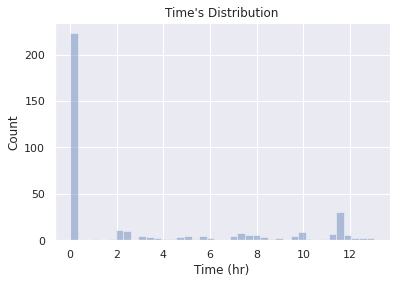

In [10]:
# Plotting the time columns : Histogram

sns.distplot(data.Time, bins=40,kde=False)

plt.xlabel('Time (hr)')
plt.ylabel('Count')
plt.title('Time\'s Distribution')

# Most of the Amounts are drawn out in the Mid-Night
# it is also possible 

Text(0.5, 1.0, " Amount's Distribution")

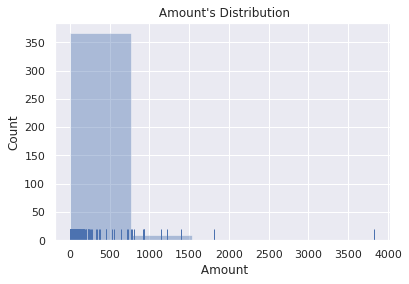

In [11]:
# Plotting Amounts
sns.distplot(data.Amount, bins=5,kde=False,rug=True)

plt.xlabel(' Amount')
plt.ylabel('Count')
plt.title(' Amount\'s Distribution')

In [12]:
data.Amount.skew()
# +ve Skewed
# right skewed

8.361886365901299

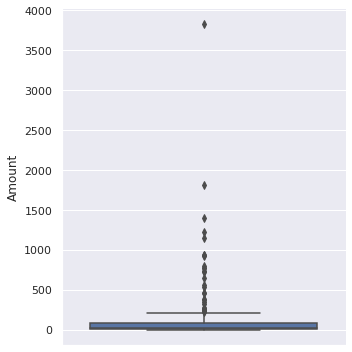

In [13]:
sns.catplot(y='Amount',data=data, kind='box')

In [0]:
from scipy import stats

In [0]:
# Performing BoxCox transformation on Amount
data.Amount, params= stats.boxcox(data.Amount+ 1e-4)

# i have added 1e-4 as some of the amounts are 0
# to shift them and then have applied the BoxCox Transformation

In [16]:
# Plotting a boxplot
data.Amount.describe()

count    377.000000
mean       3.270294
std        2.840339
min       -6.181241
25%        0.705372
50%        3.263941
75%        5.556627
max       12.420381
Name: Amount, dtype: float64

In [17]:
data.Amount.skew()  # Skewness is decreased

0.04535252740379667

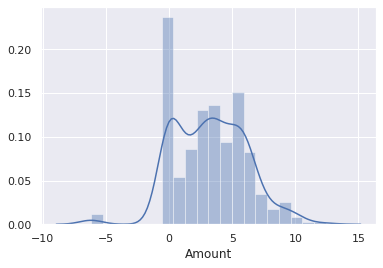

In [18]:
sns.distplot(data.Amount, bins=20,kde=True,rug=False)

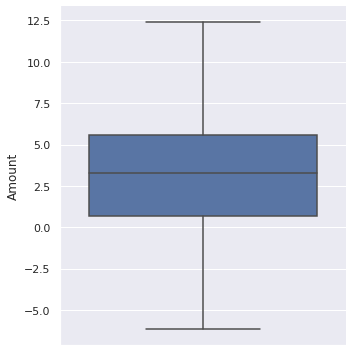

In [19]:
sns.catplot(y='Amount',data=data, kind='box')

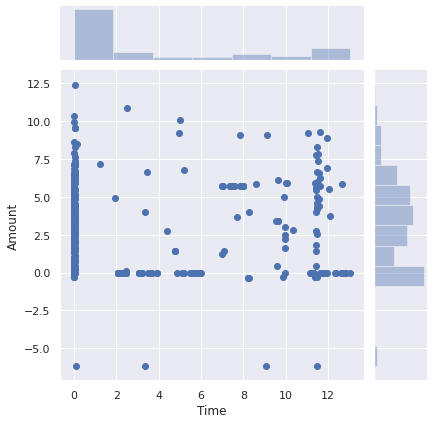

In [20]:
# Plotting a Joint plot to analyze Time vs Amount if they are related

sns.jointplot(x='Time',y='Amount',data=data)

# From the scatter plot, we can say 
# 1. Many Transactions are done in MidNight
# 2. Then the 2nd most transactions are done at 12(approx)

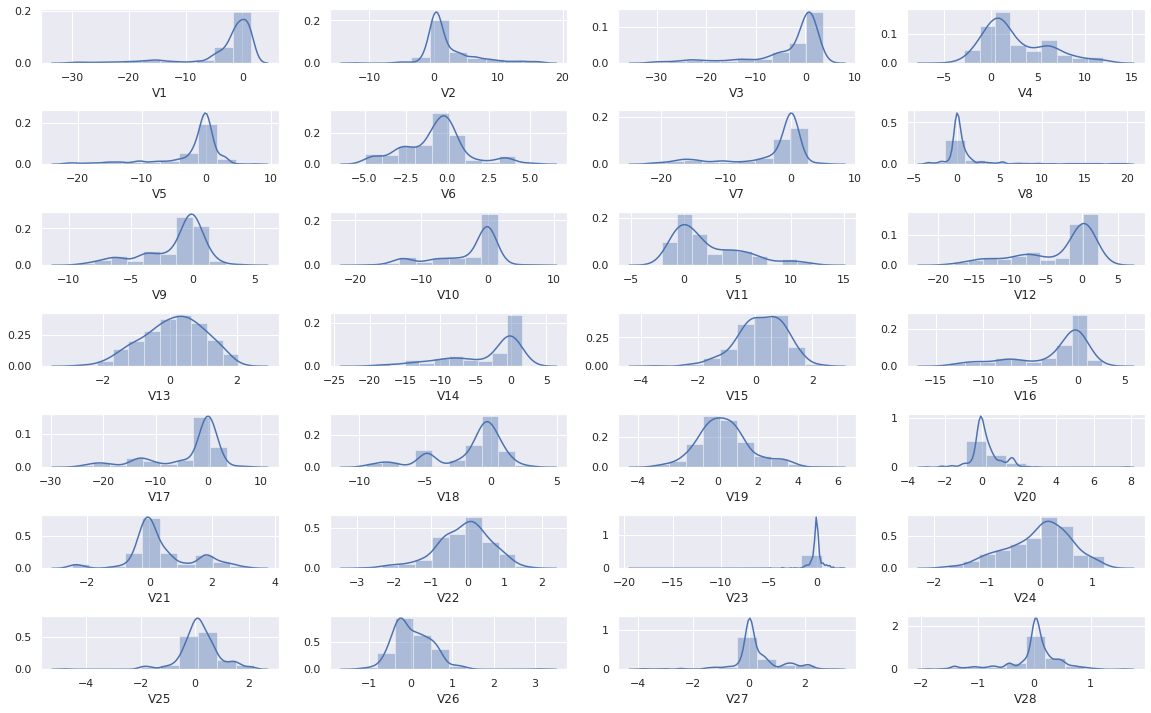

In [21]:
# Plotting the histograms for v1 to v28
cols= data.drop(columns=['Time','Amount','Class']).columns

plt.figure(figsize=(16,10))

for idx,i in enumerate(cols):
  plt.subplot(7,4,idx+1)
  sns.distplot(data[i],bins=10) 

plt.tight_layout()

## Note

1. As v1 to v28 are already scaled and few of them are in Gaussian distribution, we will find the most co-relating column with respect to themselves.

2. we wil remove them as they might affect the predictions. we will a set a thresold of 0.85 to indicate the co-relational value.  

## Splitting the data
---------------------------

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x= data.drop(columns=['Class'])
y= data['Class']

In [0]:
x_train,x_test,y_train,y_test= tts(x, y, random_state=42, stratify=y,test_size=0.3)

In [25]:
x_train.shape,x_test.shape

((263, 30), (114, 30))

## Feature Selection
-----------------------------------

1. Removing the constant/Quassi-constanct/duplicate columns
   ```
   As per the analysis, There are no columns which are constant/Quassi-contant/duplicated.
   ```
2. Now we wil check for co-related features.

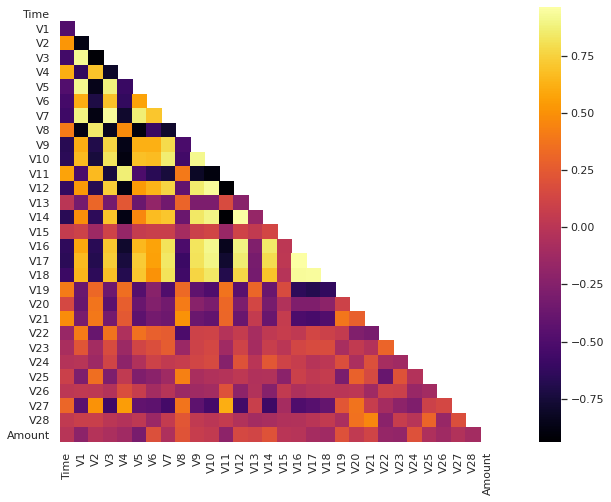

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

corelation= x_train.corr()
mask= np.triu(corelation)
sns.heatmap(corelation,annot=False,square=True,
            mask=mask,cmap='inferno')

# Yellow celss indicate higher co-relation

In [27]:
# Selection the columns which have higher co-relational value
# i will set a thresold of 0.85
# Any cell which has higher value than the thresold, we will select that column and later drop that

res=set()

for i in range(len(x_train.columns)):
  for j in range(i):
    if corelation.iloc[i,j]> 0.85  :    # we have the set the thresold bar as 0.8
      res.add(x_train.columns[i])

res,len(res)
# This the set of co-related columns 

({'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V3', 'V5', 'V7'}, 10)

In [28]:
# Dropping the co-related columns
x_train= x_train.drop(columns=res)
x_test= x_test.drop(columns=res)

x_train.shape,x_test.shape

# we have reduced the columns size for 30 to 20

((263, 20), (114, 20))

In [29]:
x_train.columns

Index(['Time', 'V1', 'V2', 'V4', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### 3. Selecting features based on Step_forward Selection
-----------------------------------------------------------

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# step forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [31]:
# step forward feature selection
# I indicate that I want to select 15 features from
# the total, and that I want to select those features
# based on the optimal roc_auc

sfs1 = SFS(RandomForestClassifier(n_jobs=-1), 
           k_features=15, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(x_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.8s finished

[2020-06-05 08:02:04] Features: 1/15 -- score: 0.9953703703703703[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   16.6s finished

[2020-06-05 08:02:21] Features: 2/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   15.6s finished

[2020-06-05 08:02:36] Features: 3/15 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.

In [32]:
selected_feat= x_train.columns[ list(sfs1.k_feature_idx_) ]
selected_feat,len(selected_feat)

(Index(['Time', 'V1', 'V2', 'V4', 'V6', 'V8', 'V9', 'V13', 'V15', 'V19', 'V20',
        'V21', 'V22', 'V23', 'V24'],
       dtype='object'), 15)

In [0]:
x_train= x_train[selected_feat]
x_test= x_test[selected_feat]

In [34]:
x_train.shape,x_test.shape
# we have redued the features from 20 to 15 Successfully.

((263, 15), (114, 15))

## Modelling and Predicting
---------------------------------------------------

In [0]:
from sklearn.preprocessing import StandardScaler as sc
from sklearn.pipeline import  make_pipeline as mp
from sklearn.linear_model import LogisticRegressionCV as lr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_auc_score,cohen_kappa_score

In [0]:
c=[]

# Defining a common function for predicting
def model_predict(model_nm ):

  # Fitting the model
  model_nm.fit(x_train,y_train)

  # Predicting the model
  predictions= model_nm.predict(x_test)

  # Getting the training and testing score
  print(f'\n Training score: {model_nm.score(x_train,y_train)} and Testing Score is : {model_nm.score(x_test,y_test)}')

  # Evaluations
  cmat= confusion_matrix(y_test,predictions)
  print(type(cmat))
  print(f'\n Confusion Matrix :\n {cmat} \n')
  c.append(cmat)  
  
  print('\n Classification Report :')
  print(classification_report(y_test,predictions))
  print(f'\nAccuracy Score : {round( accuracy_score(y_test,predictions), 2)}')
  print(f'Roc-Auc Score  : {round( roc_auc_score(y_test,predictions), 2)}')
  print(f"Cohen's kappa  :  { round(cohen_kappa_score(y_test, predictions),2)}")

  print()
    

In [0]:
# Pipeline with Logistic Regression and StandardScaler
model1= mp( sc(), 
          lr(random_state=42, Cs=np.logspace(start=-3, stop=3, num=20))
         )

# Random Forest Classifier
model2= rfc(n_estimators=200,max_depth=3,
          random_state=42, n_jobs=-1)

# Gradient Boosting Classifier
model3= GradientBoostingClassifier(n_estimators=200)

In [38]:
# Defining a dictionary with names of the classification models
models_dict= { 0: 'Logistic Regression', 1: 'Random Forest Classification' , 2: 'Gradient Boosting Classification'}

# Predicting with the defined function : model_predict
for idx,i in enumerate([model1,model2,model3]):
  print(f'\n***************** For {models_dict[idx]} *****************')
  model_predict(i)


***************** For Logistic Regression *****************

 Training score: 1.0 and Testing Score is : 0.9736842105263158
<class 'numpy.ndarray'>

 Confusion Matrix :
 [[67  0]
 [ 3 44]] 


 Classification Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy Score : 0.97
Roc-Auc Score  : 0.97
Cohen's kappa  :  0.95


***************** For Random Forest Classification *****************

 Training score: 1.0 and Testing Score is : 0.9912280701754386
<class 'numpy.ndarray'>

 Confusion Matrix :
 [[67  0]
 [ 1 46]] 


 Classification Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99       

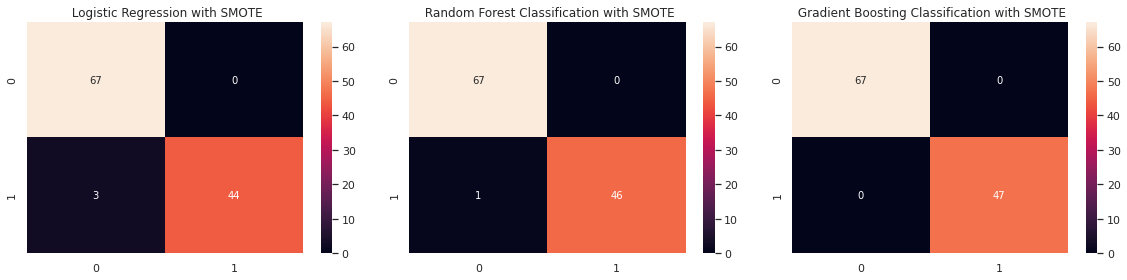

In [39]:
plt.subplots(1,3,figsize=(16,4))

plt.subplot(1,3,1)
sns.heatmap(c[0],annot=True)
plt.title(' Logistic Regression with SMOTE')

plt.subplot(1,3,2)
sns.heatmap(c[1],annot=True)
plt.title(' Random Forest Classification with SMOTE')

plt.subplot(1,3,3)
sns.heatmap(c[2],annot=True)
plt.title(' Gradient Boosting Classification with SMOTE')

plt.tight_layout()

## Conclusion
------------------------------

1. We have increased the correct predictions from Logistic Regression to Random Forest  and then on Gradient Boosting Classification, we are able to predict all the labels correctly.

2. So we will chose the **Gradient Boosting model** to do the Predictions.

# Method -2 : Doing Sampling
---------------------------------------------------

1. We can make the class proportions balanced by 2 methods.
  ```
  UnderSampling
  OverSampling
  ```

2. As here we have very less observations, we will go with *OverSampling*.

3. From different Oversampling methods, i will go with ```SMOTE```.


References : [link-1](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) [link-2](https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/over-sampling/plot_comparison_over_sampling.html#sphx-glr-auto-examples-over-sampling-plot-comparison-over-sampling-py) 

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((263, 15), (114, 15), (263,), (114,))

In [41]:
from imblearn.pipeline import make_pipeline as mp
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.preprocessing import StandardScaler as sc 
from sklearn.linear_model import LogisticRegressionCV as lrcv
from sklearn.ensemble import RandomForestClassifier as rfc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
smote=SMOTE(random_state=42)

####################################################
# With Smote as OverSampling : Model 1 and Model 2, Model 3
model1= mp( smote, 
            sc(), 
            lrcv(Cs= np.logspace(start=-3, stop=3, num=20) )
          )

model2= mp(  smote,
             rfc(n_estimators=200,max_depth=3, random_state=42, n_jobs=-1)
          )


model3= mp(  smote,
             GradientBoostingClassifier(n_estimators=200)
          )


In [43]:
# Defining a dictionary with names of the classification models
models_dict= { 0: 'Logistic Regression', 1: 'Random Forest Classification' , 2: 'Gradient Boosting Classification'}

# Predicting with the defined function : model_predict
for idx,i in enumerate([model1,model2, model3]):
  
  print('*********** Using SMOTE as Over-Sampling Technique***************')
  print(f'***************** For {models_dict[idx]} *****************\n')
  
  model_predict(i)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


*********** Using SMOTE as Over-Sampling Technique***************
***************** For Logistic Regression *****************


 Training score: 1.0 and Testing Score is : 0.9736842105263158
<class 'numpy.ndarray'>

 Confusion Matrix :
 [[67  0]
 [ 3 44]] 


 Classification Report :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Accuracy Score : 0.97
Roc-Auc Score  : 0.97
Cohen's kappa  :  0.95

*********** Using SMOTE as Over-Sampling Technique***************
***************** For Random Forest Classification *****************



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)



 Training score: 1.0 and Testing Score is : 0.9912280701754386
<class 'numpy.ndarray'>

 Confusion Matrix :
 [[67  0]
 [ 1 46]] 


 Classification Report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       1.00      0.98      0.99        47

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


Accuracy Score : 0.99
Roc-Auc Score  : 0.99
Cohen's kappa  :  0.98

*********** Using SMOTE as Over-Sampling Technique***************
***************** For Gradient Boosting Classification *****************


 Training score: 1.0 and Testing Score is : 1.0
<class 'numpy.ndarray'>

 Confusion Matrix :
 [[67  0]
 [ 0 47]] 


 Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


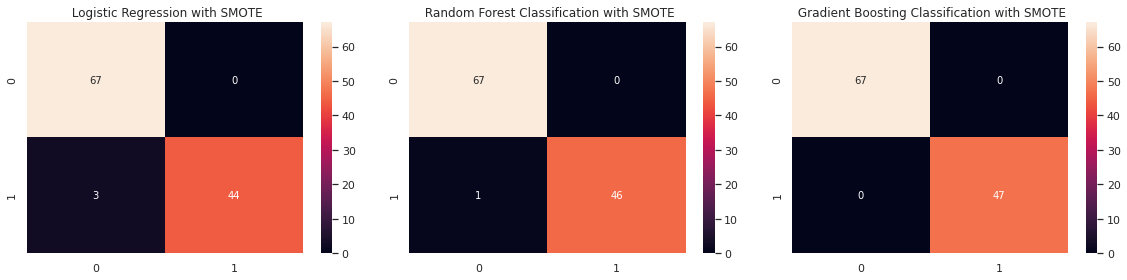

In [44]:
plt.subplots(1,3,figsize=(16,4))

plt.subplot(1,3,1)
sns.heatmap(c[0],annot=True)
plt.title(' Logistic Regression with SMOTE')

plt.subplot(1,3,2)
sns.heatmap(c[1],annot=True)
plt.title(' Random Forest Classification with SMOTE')

plt.subplot(1,3,3)
sns.heatmap(c[2],annot=True)
plt.title(' Gradient Boosting Classification with SMOTE')

plt.tight_layout()

# ConClusion
--------------------------

So we will choose the ```Gradient Boosting model``` to do the classification.